## Wczytanie pakietów

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from tabulate import tabulate

## Dane

In [7]:
df = pd.read_csv('../data/learning_data.csv')
df.head()

,ptnum,label,scc,C-103579009,C-125680007,C-186034007,C-263495000,C-398070004,C-424144002,C-72514-3,...,C-92140-3,C-92141-1,C-92142-9,C-94040-3,C-94531-1,C-979092,C-993452,C-997501,C-999998,C-999999
0,p17767.2,0,101,white,m,nonhispanic,m,massachusetts,50t70,abnormal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,p3832.1,0,110,white,m,nonhispanic,m,massachusetts,50t70,normal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,p10784.2,0,127,black,m,nonhispanic,m,massachusetts,50t70,abnormal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,p17630,0,129,white,m,nonhispanic,m,massachusetts,50t70,abnormal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,p17983,1,69,white,m,nonhispanic,m,massachusetts,50t70,abnormal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9048 entries, 0 to 9047
Columns: 785 entries, ptnum to C-999999
dtypes: float64(59), int64(2), object(724)
memory usage: 54.2+ MB


In [9]:
df.describe()

,label,scc,C-75443-2,C-84215-3,C-26453-1,C-26464-8,C-26515-7,C-30385-9,C-30428-7,C-33037-3,...,C-713-8,C-727711,C-731-0,C-736-9,C-742-7,C-751-8,C-770-8,C-82078001,C-86849004,C-86964003
count,9048.000000,9048.000000,16.0,16.0,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,...,256.000000,0.0,256.000000,256.00000,256.000000,256.000000,256.000000,0.0,0.0,0.0
mean,0.252874,103.895999,1.0,1.0,5.125166,13.175497,308.200662,13.006623,87.692715,8.339073,...,4.513672,NaN,0.945664,15.17957,0.948047,2.679687,27.573555,NaN,NaN,NaN
std,0.434683,21.988655,0.0,0.0,0.379863,1.223817,88.495507,0.899605,4.636940,3.508351,...,0.255184,NaN,0.154276,1.67533,0.075522,0.225392,3.014690,NaN,NaN,NaN
min,0.000000,9.000000,1.0,1.0,4.500000,11.100000,155.300000,11.600000,80.000000,2.000000,...,3.740000,NaN,0.500000,10.32000,0.750000,2.080000,18.610000,NaN,NaN,NaN
25%,0.000000,100.000000,1.0,1.0,4.800000,12.000000,232.950000,12.150000,83.600000,5.500000,...,4.370000,NaN,0.980000,14.08250,0.900000,2.540000,25.457500,NaN,NaN,NaN
50%,0.000000,107.000000,1.0,1.0,5.100000,13.400000,304.100000,13.100000,88.100000,8.200000,...,4.500000,NaN,1.000000,15.19000,0.950000,2.690000,27.840000,NaN,NaN,NaN
75%,1.000000,116.000000,1.0,1.0,5.400000,14.300000,386.550000,13.800000,91.400000,11.350000,...,4.680000,NaN,1.020000,16.38500,1.000000,2.830000,29.502500,NaN,NaN,NaN
max,1.000000,190.000000,1.0,1.0,5.900000,15.000000,449.900000,14.600000,96.000000,14.900000,...,5.240000,NaN,1.090000,20.15000,1.160000,3.260000,34.850000,NaN,NaN,NaN


## Nulle

In [10]:
null_percentages = df.isnull().mean()
columns_with_nulls_over_50_percent = null_percentages[null_percentages > 0.5]
columns_with_nulls_over_50_percent_df = columns_with_nulls_over_50_percent.reset_index()
columns_with_nulls_over_50_percent_df.columns = ['Column', 'Nulls']
print('10 pierwszych kolumn z 50% null')
print(tabulate(columns_with_nulls_over_50_percent_df.head(10), headers='keys', tablefmt='simple'))

10 pierwszych kolumn z 50% null
    Column          Nulls
--  -----------  --------
 0  C-762993000  0.625221
 1  C-424393004  0.51271
 2  C-2857-1     0.750663
 3  C-410006001  0.750663
 4  C-10834-0    0.610522
 5  C-715252007  0.594717
 6  C-313782     0.545314
 7  C-195662009  0.564434
 8  C-10509002   0.608311
 9  C-58000006   0.723696


In [11]:
df = df.drop(columns_with_nulls_over_50_percent.index, axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9048 entries, 0 to 9047
Data columns (total 68 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ptnum              9048 non-null   object
 1   label              9048 non-null   int64 
 2   scc                9048 non-null   int64 
 3   C-103579009        9048 non-null   object
 4   C-125680007        9048 non-null   object
 5   C-186034007        9048 non-null   object
 6   C-263495000        9048 non-null   object
 7   C-398070004        9048 non-null   object
 8   C-424144002        9048 non-null   object
 9   C-72514-3          9044 non-null   object
 10  C-140              9043 non-null   object
 11  C-18262-6          9043 non-null   object
 12  C-2085-9           9043 non-null   object
 13  C-2093-3           9043 non-null   object
 14  C-2571-8           9043 non-null   object
 15  C-39156-5          9043 non-null   object
 16  C-710824005        9043 non-null   object


68 kolumn, 2 x int, 66 x object

In [12]:
df = df.drop('ptnum', axis=1)

## Odkodowanie nazw kolumn

In [14]:
df_codes = pd.read_csv('../data/codes.csv')
code_to_name = df_codes.set_index('code')['name'].to_dict()
code_to_name
df = df.rename(columns=code_to_name)
df.head()

,label,scc,race,marital,ethnic,gender,state,age,Pain severity - 0-10 verbal numeric rating [Score] - Reported,Influenza seasonal injectable preservative free,...,Td (adult) preservative free,Victim of intimate partner abuse (finding),Alanine aminotransferase [Enzymatic activity/volume] in Serum or Plasma,Albumin,Aspartate aminotransferase [Enzymatic activity/volume] in Serum or Plasma,Alkaline phosphatase [Enzymatic activity/volume] in Serum or Plasma,Bilirubin.total [Mass/volume] in Serum or Plasma,Body temperature,Initial patient assessment (procedure),Development of individualized plan of care (procedure)
0,0,101,white,m,nonhispanic,m,massachusetts,50t70,abnormal,True,...,True,True,NaN,NaN,NaN,NaN,NaN,normal,True,True
1,0,110,white,m,nonhispanic,m,massachusetts,50t70,normal,True,...,NaN,NaN,abnormal,normal,normal,normal,normal,NaN,True,True
2,0,127,black,m,nonhispanic,m,massachusetts,50t70,abnormal,True,...,True,NaN,abnormal,normal,normal,abnormal,normal,NaN,True,True
3,0,129,white,m,nonhispanic,m,massachusetts,50t70,abnormal,True,...,NaN,True,abnormal,normal,normal,abnormal,normal,NaN,True,True
4,1,69,white,m,nonhispanic,m,massachusetts,50t70,abnormal,True,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Rozkład zmiennych kategorycznych

In [15]:
categorical_columns = df.select_dtypes(include = ['object'])

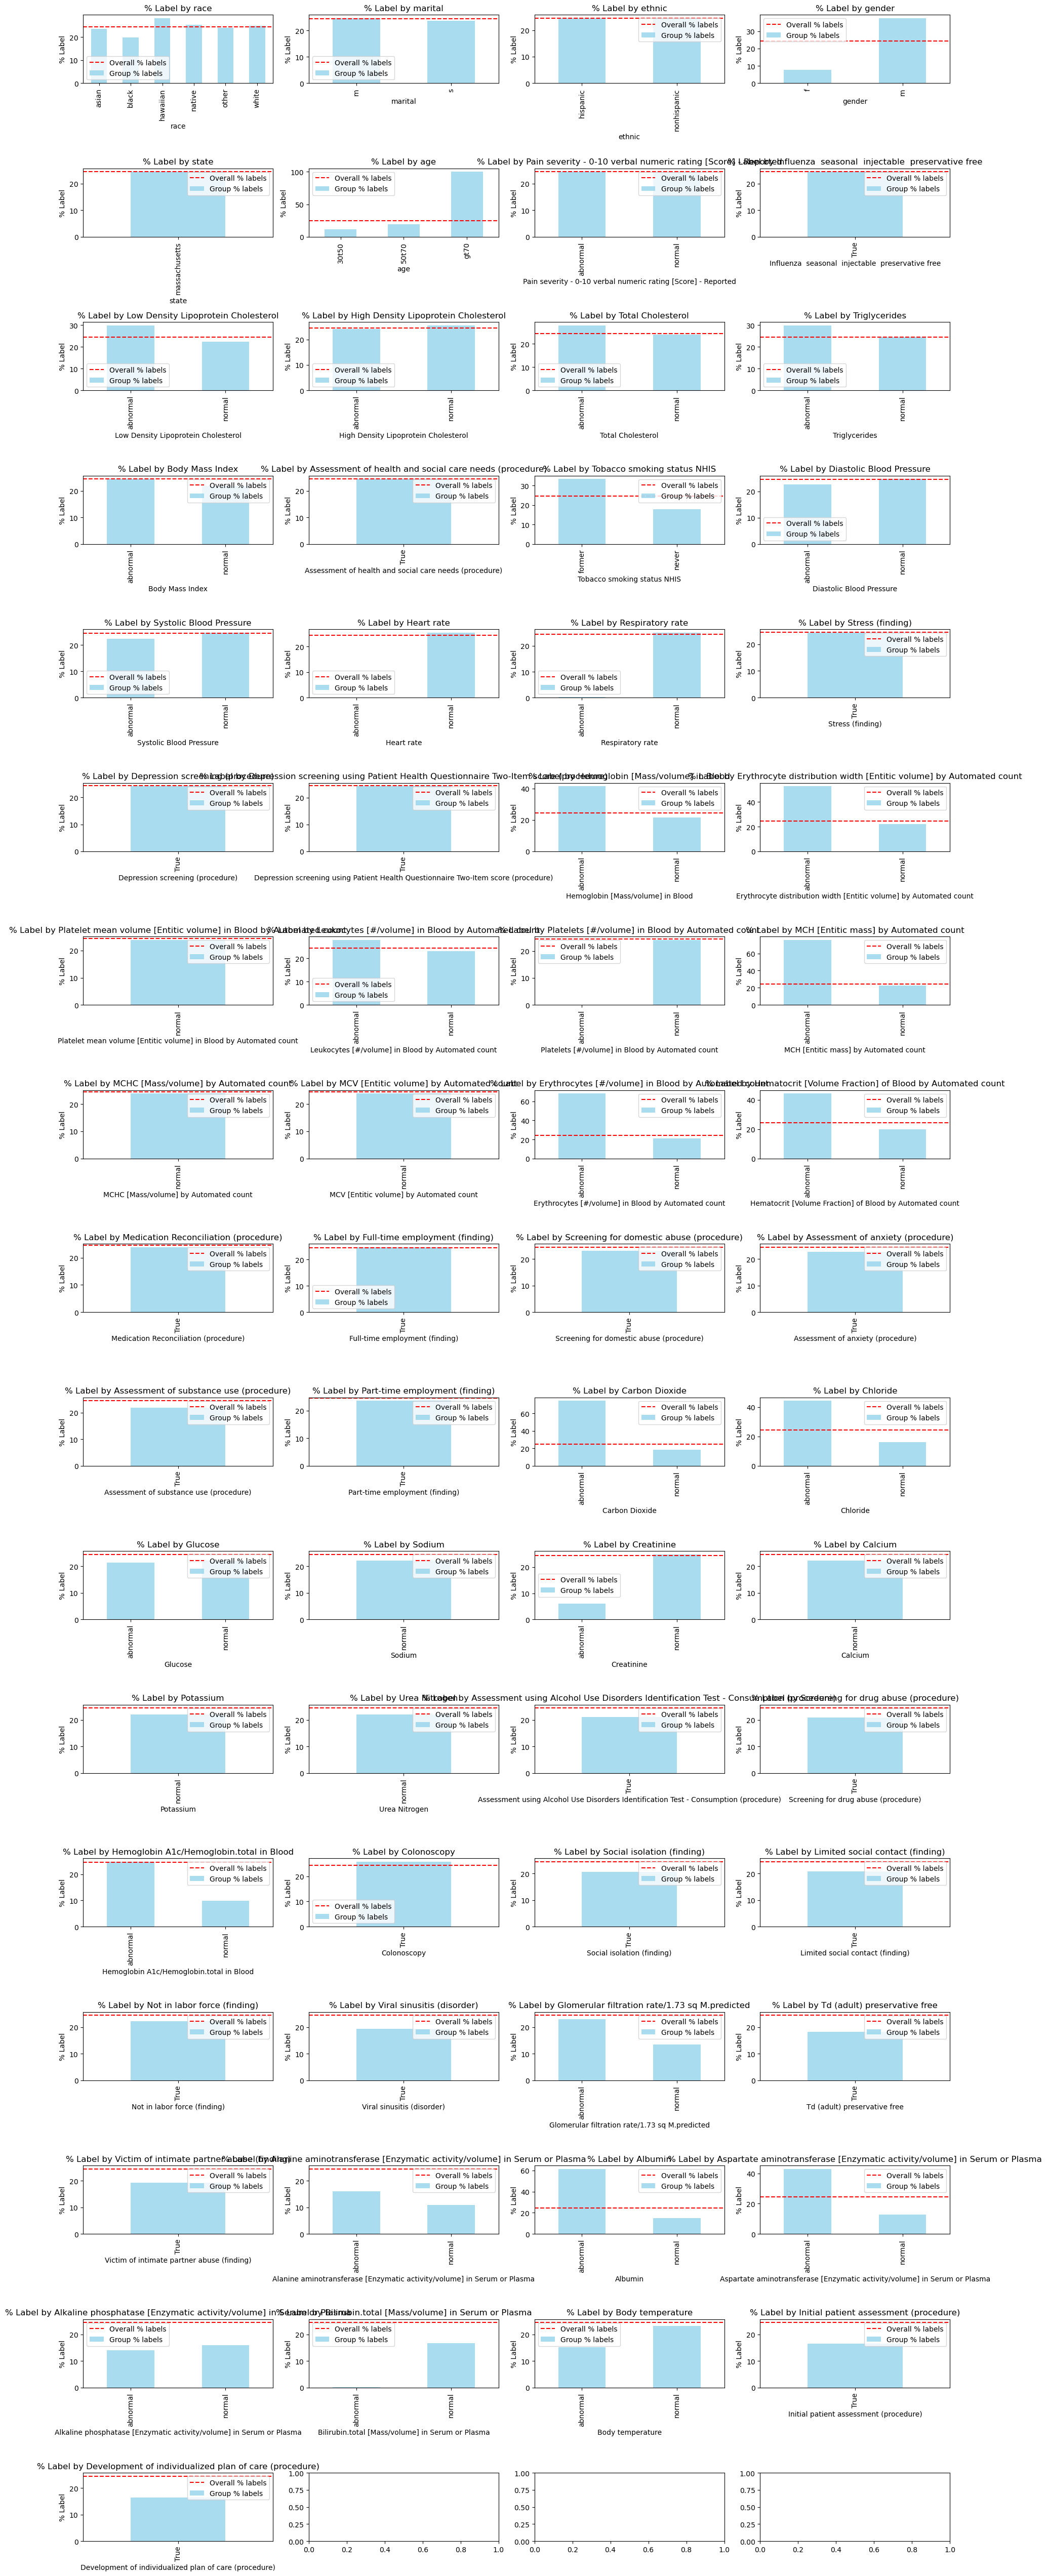

In [26]:
label_percentage = {}
for column in categorical_columns:
    label_percentage[column] = df.groupby(column)['label'].mean() * 100

overall_label_percentage = df['label'].mean() * 100

fig, axes = plt.subplots(nrows = 17, ncols = 4, figsize = (18, 51))

axes = axes.flatten()

for i, column in enumerate(categorical_columns):
    ax = axes[i]
    label_percentage[column].plot(kind = 'bar', ax = ax, color = 'skyblue', alpha = 0.7, label = 'Group % labels')
    ax.axhline(overall_label_percentage, color = 'red', linestyle = '--', label = 'Overall % labels')
    ax.set_title(f'% Label by {column}')
    ax.set_ylabel('% Label')
    ax.legend()

plt.tight_layout()
plt.show()

24,47 % pacjentów ma label 1

### Kolumny, w których widać rónicę między label a rozkładem zmiennych
- age (wszyscy pacjenci po 70 mają label 1)
- gender (kobiety zdiagnozowane rzadziej niż średnia, mężczyźni częściej)
- Low Density Lipoprotein Cholesterol (osoby o kategorii abnormal częściej diagnozowane)
- Total Cholesterol (niewielka różnica dla kategorii abnormal)
- Triglycerides (niewielka różnica dla kategorii abnormal)
- Tabacco smoking status (byli palacze częściej diagnozowani, osoby nigdy niepalące rzadziej)
- Hemoglobin in Blood (osoby o kategorii abnormal znacząco częściej diagnozowane)
- MCH (Entitic mass) by Automated count (osoby o kategorii abnormal znacząco częściej diagnozowane, > 60%)
- Erythrocytes (#/volume) in Blood by Automated count (osoby o kategorii abnormal znacząco częściej diagnozowane, > 60 %)
- Hematocrit (Volume Fraction) of Blood (osoby o kategorii abnormal znacząco częściej diagnozowane, > 40%)
- Carbon Dioxide (osoby o kategorii abnormal znacząco częściej diagnozowane, > 60%)
- Chloride (osoby o kategorii abnormal znacząco częściej diagnozowane, > 40%, osoby z kategorii normal rzadziej, 15%)
- Creatinine (osoby o kategorii normal znacząco rzadziej diagnozowane, < 10%)
- Hemoglobin A1c/Hemoglobin.total in Blood (osoby o kategorii normal znacząco rzadziej diagnozowane, < 10%)
- Albumin (osoby o kategorii abnormal znacząco częściej diagnozowane, > 60%)
- Aspartate aminotransferase [Enzymatic activity/volume] in Serum or Plasma (osoby o kategorii abnormal znacząco częściej diagnozowane, > 40%)

### Inne wnioski
- kolumnę 'state' można usunąć - wszyscy pacienci są z tego samego stanu
- kolumnę 'ethnic' można usunąć - dla każdej zmiennej taki sam rozkład
- kolumna 'race' tez imo do usunięcia
- wiele kolumn ma jedynie kategorię True, nie mają kategorii False, wszystko pozostałe to null, większość ma % True okolo 20%, czyli około odsetku pacjentów z label = 1 -> usuwamy 

### Zmienne, które mogą mieć jakąś korelację
- low density lipoprotein cholesterol, high density lipoprotein cholesterol, total cholesterol

In [16]:
# usunięcie kolumn o jednej unikalnej wartości
for column in df.columns:
    unique_values = df[column].dropna().unique()
    if len(unique_values) == 1:
        df.drop(columns=[column], inplace=True)
df.drop(columns=['race', 'ethnic'], inplace=True)

In [17]:
df.shape

(9048, 35)

Mamy teraz 35 kolumn.

### Zależność między kolumnami z cholesterolem

<AxesSubplot:>

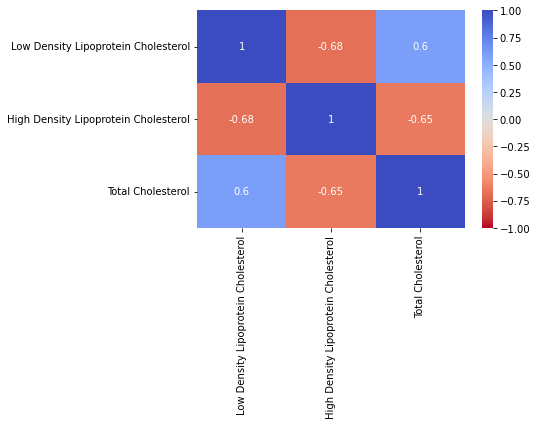

In [18]:
new_df = df[["Low Density Lipoprotein Cholesterol", "High Density Lipoprotein Cholesterol", "Total Cholesterol"]]
new_df.replace({"normal": 0, "abnormal": 1}, inplace=True)
sns.heatmap(new_df.corr(), annot=True, cmap='coolwarm_r', center=0, vmin=-1, vmax=1)